You work for an asset management firm as a research analyst. One day, a client called the portfolio manager to do research on Tesla stock and Bitcoin to find out which one would have a higher monthly return. The portfolio manager asked you to collect some data points and provide some statistics. Is there a statistically significant difference in the average monthly return between Tesla stock and Bitcoin?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
import pandas_datareader.data as pdr
import scipy.stats as stats

In [2]:
yf.pdr_override()

start = datetime.strptime('2017-01-01', '%Y-%m-%d')
end = datetime.strptime('2022-04-01', '%Y-%m-%d')

tesla = pdr.DataReader('TSLA', start, end , data_source='yahoo')['Adj Close']
btc = pdr.DataReader('BTC-USD', start, end , data_source='yahoo')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


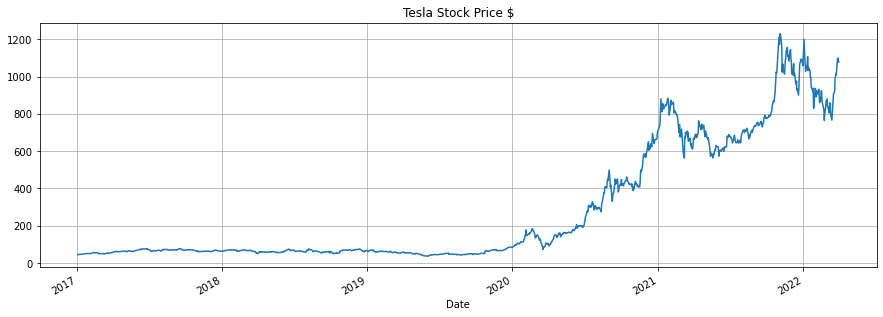

In [3]:
tesla.plot(figsize=(15,5), title = "Tesla Stock Price $")
plt.grid(True)

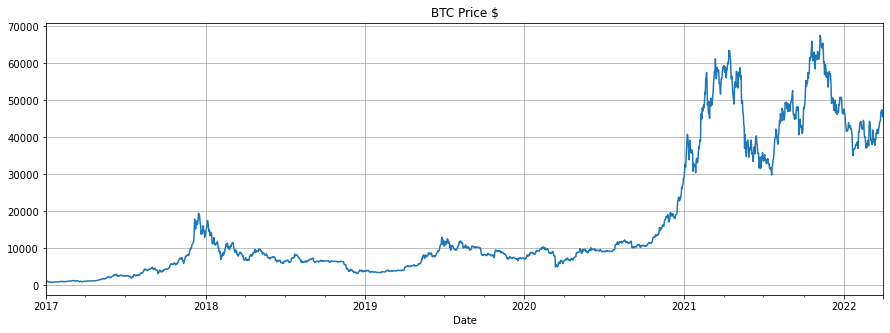

In [4]:
btc.plot(figsize=(15,5), title = "BTC Price $")
plt.grid(True)

In [5]:
df = pd.concat([tesla, btc],axis=1).dropna()
df.columns = ["TSLA", "BTC-USD"]
df

,TSLA,BTC-USD
Date,,
2017-01-03,43.397999,1043.839966
2017-01-04,45.397999,1154.729980
2017-01-05,45.349998,1013.380005
2017-01-06,45.801998,902.200989
2017-01-09,46.256001,902.828003
...,...,...
2022-03-25,1010.640015,44348.730469
2022-03-28,1091.839966,47128.003906
2022-03-29,1099.569946,47465.730469


In [6]:
monthly_ret = df.pct_change(21).dropna()
monthly_ret

,TSLA,BTC-USD
Date,,
2017-02-02,0.159270,-0.030694
2017-02-03,0.107229,-0.108094
2017-02-06,0.136803,0.024443
2017-02-07,0.124318,0.176401
2017-02-08,0.133172,0.177489
...,...,...
2022-03-25,0.262085,0.156945
2022-03-28,0.348167,0.201809
2022-03-29,0.263249,0.098916


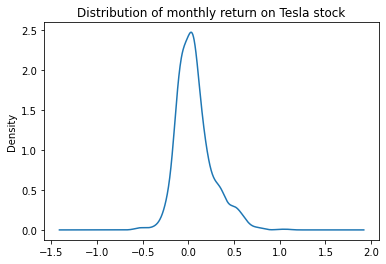

In [7]:
monthly_ret["TSLA"].plot(kind='kde',\
                         title = "Distribution of monthly return on Tesla stock")

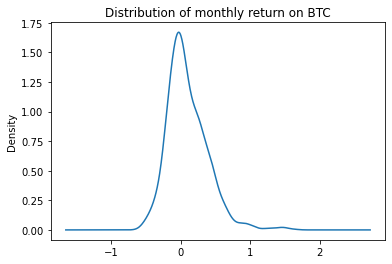

In [8]:
monthly_ret["BTC-USD"].plot(kind='kde',\
                            title = "Distribution of monthly return on BTC")

In [9]:
monthly_ret.describe()

,TSLA,BTC-USD
count,1300.000000,1300.000000
mean,0.066115,0.099392
std,0.197894,0.291822
min,-0.579194,-0.555122
25%,-0.068428,-0.096523
50%,0.038832,0.047655
75%,0.151572,0.265659
max,1.087066,1.631464


In [10]:
stats.ttest_ind(monthly_ret["TSLA"], monthly_ret["BTC-USD"])

Ttest_indResult(statistic=-3.4028656725459516, pvalue=0.0006769304421094667)

Since there is statistically significant difference in the average monthly returns between Tesla stock and Bitcoin, the client has decided to add Bitcoin to the current portfolio that consists of only Apple stock. What is the weight percentage of Bitcoin should the portfolio manager choose in order to maxmize the Sharpe ratio of the overall client's portfolio?